In [84]:
import pandas as pd

In [85]:
df=pd.read_csv("companies.csv",encoding="latin")

In [86]:
df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [87]:
df["primary_sector"]=df["category_list"].str.split("|").str[0]

In [88]:
df.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software


In [89]:
df2=pd.read_csv("mapping.csv",encoding="latin")

In [90]:
df2.head(2)

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   permalink       66368 non-null  object
 1   name            66367 non-null  object
 2   homepage_url    61310 non-null  object
 3   category_list   63220 non-null  object
 4   status          66368 non-null  object
 5   country_code    59410 non-null  object
 6   state_code      57821 non-null  object
 7   region          58338 non-null  object
 8   city            58340 non-null  object
 9   founded_at      51147 non-null  object
 10  primary_sector  63220 non-null  object
dtypes: object(11)
memory usage: 5.6+ MB


In [92]:
# df2=df2.rename("category_list","primary_sector")
df2.rename(columns={'category_list': 'primary_sector'}, inplace=True)

In [93]:

# Function to get the column name where the binary value is 1
def get_selected_column(row):
    return df2.columns[row.argmax() + 1]  # +1 to skip the 'name' column


In [94]:
# Apply the function row-wise to get the selected column
df2['Main_market'] = df2.iloc[:, 1:].apply(get_selected_column, axis=1)  # Ignore the 'name' column


In [95]:
df2.head()

,primary_sector,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",Main_market
0,NaN,0,1,0,0,0,0,0,0,0,Blanks
1,3D,0,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"


In [96]:
df2=df2[['primary_sector','Main_market']]

In [97]:
df2.head()

,primary_sector,Main_market
0,NaN,Blanks
1,3D,Manufacturing
2,3D Printing,Manufacturing
3,3D Technology,Manufacturing
4,Accounting,"Social, Finance, Analytics, Advertising"


In [98]:
df3=pd.merge(df, df2, on='primary_sector', how='left')

In [99]:
df3.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,Main_market
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging"
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,"News, Search and Messaging"
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging"
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010,Software,Others


In [100]:
df4=pd.read_csv("rounds2.csv",encoding="latin")

In [101]:
df4.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [102]:
df4.rename(columns={'company_permalink': 'permalink'}, inplace=True)

In [103]:
df4['permalink'] = df4['permalink'].str.lower()

In [104]:
df3['permalink'] = df3['permalink'].str.lower()

In [105]:

df5=pd.merge(df3, df4, on='permalink', how='left')

In [106]:
df5.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,Main_market,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging",/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms,"News, Search and Messaging",/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps,"News, Search and Messaging",/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web,"News, Search and Messaging",/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [107]:
filtered_df = df5[
    (df5['funding_round_type'] == 'venture') & 
    (df5['country_code'].isin(["USA", "IND", "GBR"])) & 
    (df5['raised_amount_usd'] >= 5000000) & 
    (df5['raised_amount_usd'] <= 15000000)
]


In [108]:
# filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13108 entries, 0 to 114934
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   permalink                13108 non-null  object 
 1   name                     13108 non-null  object 
 2   homepage_url             12482 non-null  object 
 3   category_list            13013 non-null  object 
 4   status                   13108 non-null  object 
 5   country_code             13108 non-null  object 
 6   state_code               13090 non-null  object 
 7   region                   13068 non-null  object 
 8   city                     13068 non-null  object 
 9   founded_at               11198 non-null  object 
 10  primary_sector           13013 non-null  object 
 11  Main_market              12120 non-null  object 
 12  funding_round_permalink  13108 non-null  object 
 13  funding_round_type       13108 non-null  object 
 14  funding_round_code       9

In [109]:
# df1=filtered_df[filtered_df["country_code"]=="USA"]
# df1 = df1[~(df1['Main_market']=="Blanks")]
# df1.head()

In [110]:
# Top Sector name (no. of investment-wise)
# grouped_df = df1.groupby('Main_market').sum()



In [111]:
# df_sorted = grouped_df.sort_values(by='raised_amount_usd', ascending=False)

In [112]:
# # Find the index of the max 'raised_amount_usd' in each 'Main_market'
# max_scores_idx = df1.groupby('Main_market')['raised_amount_usd'].idxmax()

# # Retrieve rows from the DataFrame using the indices
# max_scores = df1.loc[max_scores_idx, ['Main_market', 'name', 'raised_amount_usd']].reset_index(drop=True)

# # Count the number of occurrences for each 'Main_market'
# market_counts = df1['Main_market'].value_counts()

# # Map these counts to the 'max_scores' DataFrame
# max_scores['count_of_main_market'] = max_scores['Main_market'].map(market_counts)

# # max_scores

In [113]:
# df1_max_scores= max_scores.sort_values(by='count_of_main_market', ascending=False)

In [114]:
# Iterating with itertuples
sectors={
    "USA":[],
    "IND":[],
    "GBR":[]
}
counts={
    "USA":[],
    "IND":[],
    "GBR":[]
}

for country in ["USA","IND","GBR"]:
    df1=filtered_df[filtered_df["country_code"]==country]
    df1 = df1[~(df1['Main_market']=="Blanks")]
    # df1.head()
    # Top Sector name (no. of investment-wise)
    grouped_df = df1.groupby('Main_market').sum()
    # Find the index of the max 'raised_amount_usd' in each 'Main_market'
    max_scores_idx = df1.groupby('Main_market')['raised_amount_usd'].idxmax()

    # Retrieve rows from the DataFrame using the indices
    max_scores = df1.loc[max_scores_idx, ['Main_market', 'name', 'raised_amount_usd']].reset_index(drop=True)

    # Count the number of occurrences for each 'Main_market'
    market_counts = df1['Main_market'].value_counts()

    # Map these counts to the 'max_scores' DataFrame
    max_scores['count_of_main_market'] = max_scores['Main_market'].map(market_counts)
    
    df1_max_scores= max_scores.sort_values(by='count_of_main_market', ascending=False)
    
    count=0
    for row in df1_max_scores.itertuples():
        sectors[country].append(row.Main_market)
        counts[country].append(row.count_of_main_market)
        if count==2:
            break
        count+=1
    
    

In [115]:
print(sectors)

{'USA': ['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising'], 'IND': ['Others', 'News, Search and Messaging', 'Entertainment'], 'GBR': ['Others', 'Cleantech / Semiconductors', 'Social, Finance, Analytics, Advertising']}


In [116]:
print(counts)

{'USA': [2923, 2297, 1912], 'IND': [109, 52, 33], 'GBR': [143, 127, 98]}


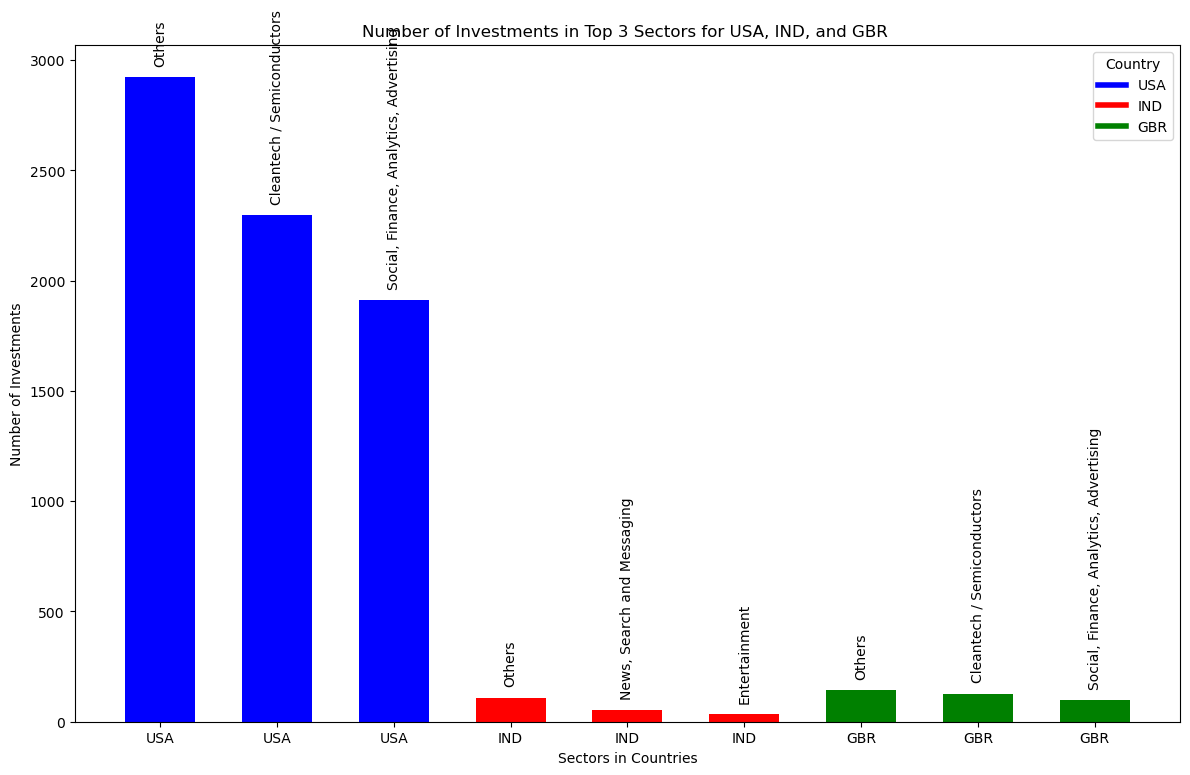

In [117]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
countries = ['USA', 'IND', 'GBR']
investments =counts

# Flattening data for plotting in sequence
sectors_combined = sectors['USA'] + sectors['IND'] + sectors['GBR']
investments_combined = investments['USA'] + investments['IND'] + investments['GBR']
countries_combined = ['USA'] * 3 + ['IND'] * 3 + ['GBR'] * 3

# Creating x positions for each bar
x = np.arange(len(investments_combined))
width = 0.6  # Bar width

# Creating the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define colors for each country
colors = {'USA': 'b', 'IND': 'r', 'GBR': 'g'}

# Plotting the bars with different colors
for i, country in enumerate(countries_combined):
    ax.bar(x[i], investments_combined[i], width=width, color=colors[country])

# Adding sector labels above the bars
for i, val in enumerate(investments_combined):
    ax.text(x[i], val + 50, sectors_combined[i], ha='center', va='bottom', rotation=90)

# Adding labels and title
ax.set_xlabel('Sectors in Countries')
ax.set_ylabel('Number of Investments')
ax.set_title('Number of Investments in Top 3 Sectors for USA, IND, and GBR ')
ax.set_xticks(x)
ax.set_xticklabels(countries_combined)

# Adding a legend
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in colors.values()]
labels = colors.keys()
ax.legend(handles, labels, title='Country')

plt.tight_layout()
plt.show()
